# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

15:54:03 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=242397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=329334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=330569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=600421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=644764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=29128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

15:54:05 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=432315;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=528521;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

15:54:06 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=389364;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=344949;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

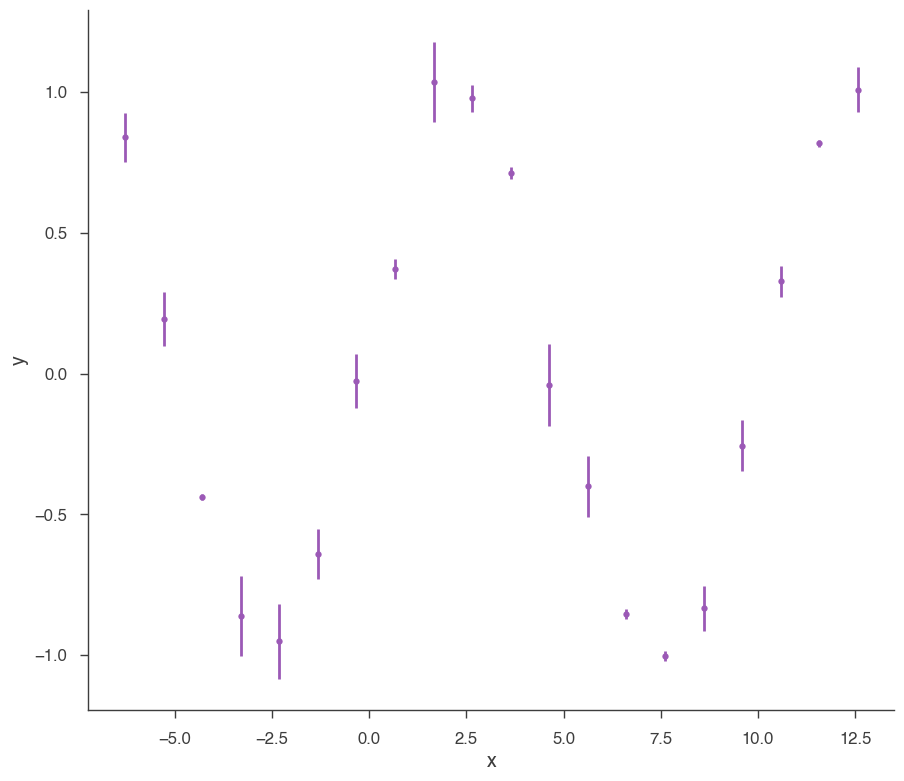

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=278541;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=206556;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

15:54:09 INFO      Mean acceptance fraction: 0.7178                                            ]8;id=260009;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=887518;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

15:54:10 INFO      fit restored to maximum of posterior                                         ]8;id=861184;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=822509;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=428686;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=18587;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                               
demo.spectrum.main.Sin.K     (9.95 -0.09 +0.10) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (9.979 -0.023 +0.024) x 10^-2        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo          -9.26888
total         -9.26888

Values of statistical measures:

statistical measures
AIC              23.243643
BIC              24.529225
DIC              22.453615
PDIC              1.956110

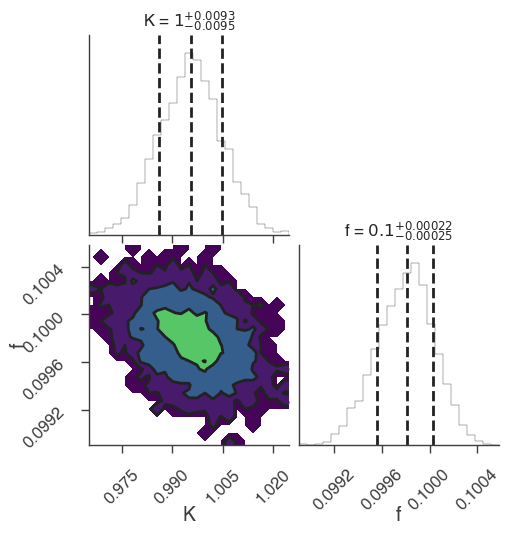

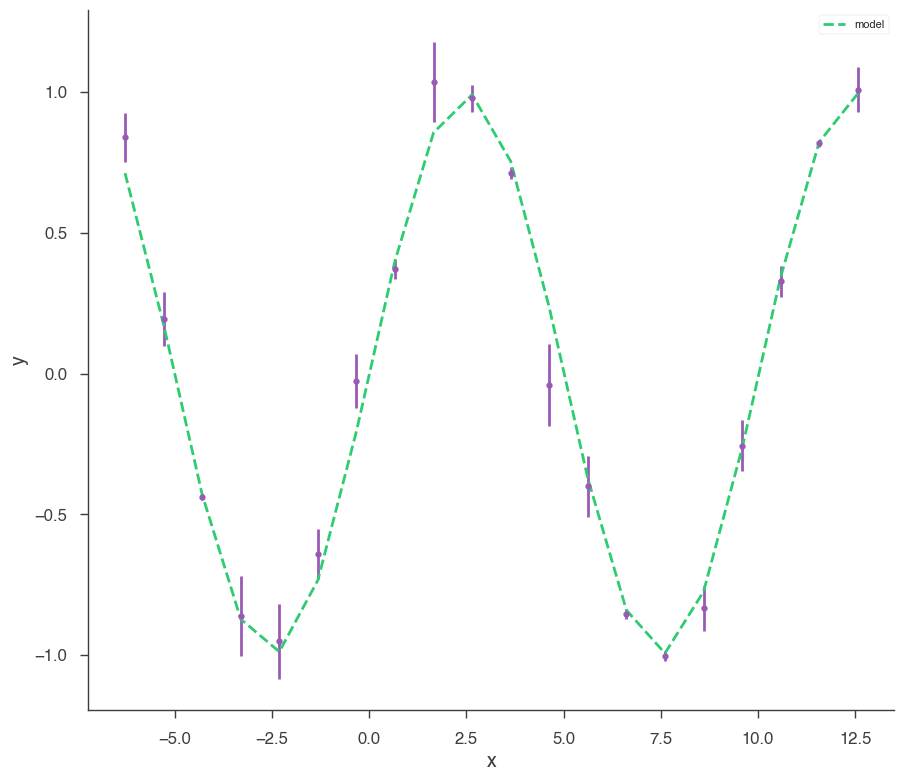

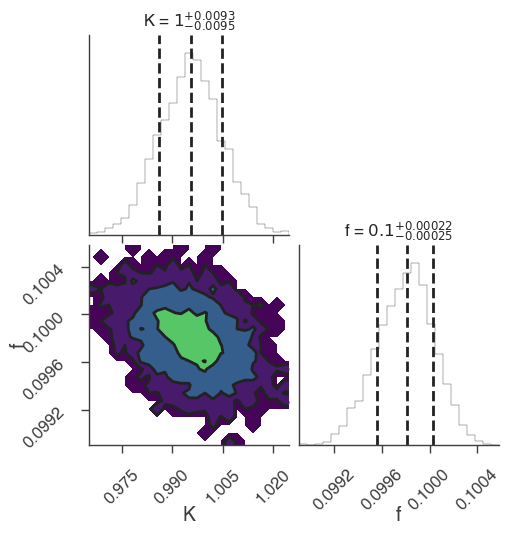

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

15:54:11 INFO      sampler set to multinest                                                ]8;id=26771;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=541680;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -19.830686793747613      +/-  0.15447915976492130     
 Total Likelihood Evaluations:         6505
 Sampling finished. Exiting MultiNest



15:54:12 INFO      fit restored to maximum of posterior                                         ]8;id=957683;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=19757;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=918039;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=20780;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                               
demo.spectrum.main.Sin.K     (9.96 -0.09 +0.07) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (9.977 -0.022 +0.026) x 10^-2        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -9.271775
total        -9.271775

Values of statistical measures:

statistical measures
AIC                23.249433
BIC                24.535015
DIC                22.489130
PDIC                1.973088
log(Z)             -8.612358

         INFO      deleting the chain directory chains                                     ]8;id=467347;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=323986;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

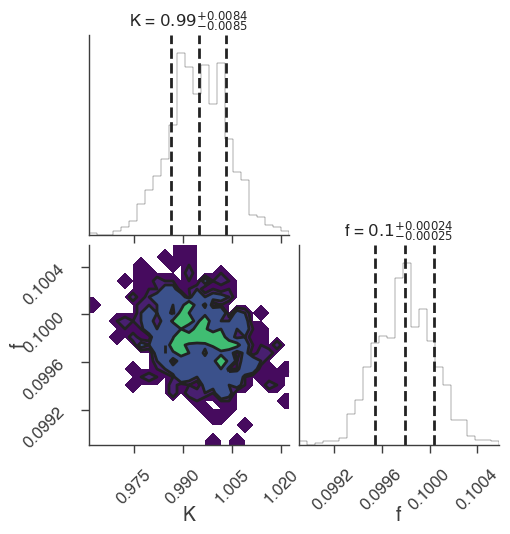

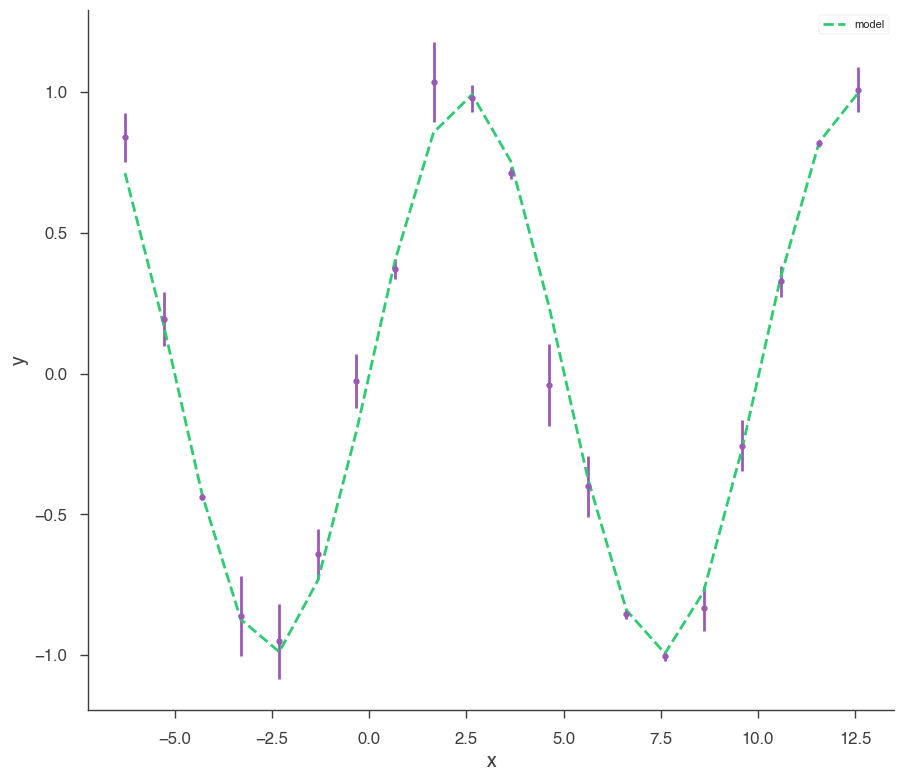

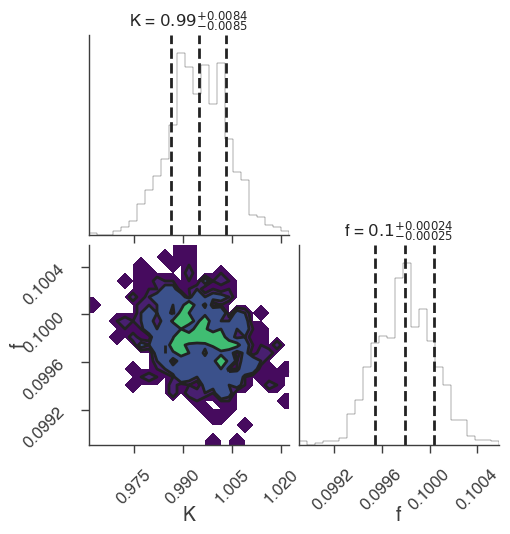

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

15:54:13 INFO      sampler set to dynesty_nested                                           ]8;id=418811;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=717954;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

223it [00:00, 2225.28it/s, bound: 0 | nc: 1 | ncall: 688 | eff(%): 32.413 | loglstar:   -inf < -12311.896 <    inf | logz: -12319.137 +/-  0.134 | dlogz: 12286.085 >  0.409]

446it [00:00, 1702.07it/s, bound: 0 | nc: 11 | ncall: 1171 | eff(%): 38.087 | loglstar:   -inf < -8765.990 <    inf | logz: -8773.692 +/-  0.136 | dlogz: 8735.298 >  0.409] 

624it [00:00, 1492.01it/s, bound: 0 | nc: 11 | ncall: 1840 | eff(%): 33.913 | loglstar:   -inf < -6979.336 <    inf | logz: -6987.127 +/-  0.135 | dlogz: 6946.911 >  0.409]

779it [00:00, 1165.46it/s, bound: 0 | nc: 20 | ncall: 2591 | eff(%): 30.066 | loglstar:   -inf < -6101.546 <    inf | logz: -6110.158 +/-  0.146 | dlogz: 6072.626 >  0.409]

905it [00:00, 1013.09it/s, bound: 0 | nc: 1 | ncall: 3408 | eff(%): 26.555 | loglstar:   -inf < -5278.309 <    inf | logz: -5287.251 +/-  0.149 | dlogz: 5261.723 >  0.409] 

1013it [00:01, 752.36it/s, bound: 0 | nc: 1 | ncall: 4588 | eff(%): 22.079 | loglstar:   -inf < -4380.357 <    inf | logz: -4389.571 +/-  0.152 | dlogz: 4400.328 >  0.409]

1099it [00:01, 656.63it/s, bound: 0 | nc: 12 | ncall: 5537 | eff(%): 19.848 | loglstar:   -inf < -2527.129 <    inf | logz: -2536.546 +/-  0.153 | dlogz: 2524.967 >  0.409]

1172it [00:01, 546.48it/s, bound: 0 | nc: 68 | ncall: 6878 | eff(%): 17.040 | loglstar:   -inf < -1972.732 <    inf | logz: -1982.341 +/-  0.155 | dlogz: 1972.319 >  0.409]

1233it [00:01, 488.95it/s, bound: 0 | nc: 12 | ncall: 8003 | eff(%): 15.407 | loglstar:   -inf < -1670.473 <    inf | logz: -1679.888 +/-  0.149 | dlogz: 1664.767 >  0.409]

1286it [00:01, 440.49it/s, bound: 0 | nc: 29 | ncall: 8793 | eff(%): 14.625 | loglstar:   -inf < -1457.788 <    inf | logz: -1467.651 +/-  0.156 | dlogz: 1454.586 >  0.409]

1332it [00:01, 414.25it/s, bound: 0 | nc: 13 | ncall: 9800 | eff(%): 13.592 | loglstar:   -inf < -1342.186 <    inf | logz: -1352.038 +/-  0.153 | dlogz: 1337.190 >  0.409]

1375it [00:02, 310.10it/s, bound: 0 | nc: 17 | ncall: 11152 | eff(%): 12.330 | loglstar:   -inf < -1201.695 <    inf | logz: -1211.326 +/-  0.151 | dlogz: 1195.587 >  0.409]

1410it [00:02, 305.15it/s, bound: 0 | nc: 14 | ncall: 12011 | eff(%): 11.739 | loglstar:   -inf < -1103.767 <    inf | logz: -1113.698 +/-  0.153 | dlogz: 1098.100 >  0.409]

1443it [00:02, 265.77it/s, bound: 0 | nc: 7 | ncall: 13324 | eff(%): 10.830 | loglstar:   -inf < -1007.089 <    inf | logz: -1016.116 +/-  0.147 | dlogz: 999.384 >  0.409]  

1472it [00:02, 239.29it/s, bound: 0 | nc: 23 | ncall: 14407 | eff(%): 10.217 | loglstar:   -inf < -936.530 <    inf | logz: -946.597 +/-  0.155 | dlogz: 931.040 >  0.409] 

1497it [00:02, 198.50it/s, bound: 1 | nc: 1 | ncall: 14856 | eff(%): 10.077 | loglstar:   -inf < -893.091 <    inf | logz: -902.916 +/-  0.150 | dlogz: 886.369 >  0.409] 

1650it [00:02, 448.52it/s, bound: 1 | nc: 2 | ncall: 15086 | eff(%): 10.937 | loglstar:   -inf < -620.958 <    inf | logz: -630.438 +/-  0.148 | dlogz: 614.244 >  0.409]

1801it [00:03, 527.96it/s, bound: 2 | nc: 2 | ncall: 15443 | eff(%): 11.662 | loglstar:   -inf < -437.048 <    inf | logz: -446.734 +/-  0.151 | dlogz: 430.084 >  0.409]

1994it [00:03, 796.67it/s, bound: 2 | nc: 2 | ncall: 15735 | eff(%): 12.672 | loglstar:   -inf < -275.008 <    inf | logz: -285.181 +/-  0.151 | dlogz: 267.999 >  0.409]

2126it [00:03, 689.18it/s, bound: 3 | nc: 1 | ncall: 16044 | eff(%): 13.251 | loglstar:   -inf < -198.298 <    inf | logz: -209.875 +/-  0.164 | dlogz: 195.893 >  0.409]

2288it [00:03, 863.97it/s, bound: 3 | nc: 1 | ncall: 16280 | eff(%): 14.054 | loglstar:   -inf < -134.439 <    inf | logz: -145.130 +/-  0.156 | dlogz: 129.604 >  0.409]

2419it [00:03, 958.63it/s, bound: 3 | nc: 1 | ncall: 16573 | eff(%): 14.596 | loglstar:   -inf < -99.862 <    inf | logz: -110.192 +/-  0.155 | dlogz: 94.991 >  0.409]  

2535it [00:03, 818.52it/s, bound: 4 | nc: 1 | ncall: 16753 | eff(%): 15.132 | loglstar:   -inf < -77.665 <    inf | logz: -87.886 +/-  0.154 | dlogz: 72.313 >  0.409] 

2713it [00:04, 1022.72it/s, bound: 4 | nc: 2 | ncall: 17038 | eff(%): 15.923 | loglstar:   -inf < -52.624 <    inf | logz: -63.196 +/-  0.154 | dlogz: 47.217 >  0.409]

2836it [00:04, 824.48it/s, bound: 5 | nc: 1 | ncall: 17294 | eff(%): 16.399 | loglstar:   -inf < -39.857 <    inf | logz: -50.291 +/-  0.155 | dlogz: 33.963 >  0.409] 

3033it [00:04, 1057.85it/s, bound: 5 | nc: 1 | ncall: 17580 | eff(%): 17.253 | loglstar:   -inf < -28.081 <    inf | logz: -39.067 +/-  0.156 | dlogz: 22.256 >  0.409]

3164it [00:04, 854.05it/s, bound: 6 | nc: 1 | ncall: 17874 | eff(%): 17.702 | loglstar:   -inf < -22.233 <    inf | logz: -32.794 +/-  0.155 | dlogz: 15.655 >  0.409] 

3352it [00:04, 1056.97it/s, bound: 6 | nc: 1 | ncall: 18125 | eff(%): 18.494 | loglstar:   -inf < -17.332 <    inf | logz: -27.711 +/-  0.154 | dlogz: 10.085 >  0.409]

3484it [00:04, 1105.70it/s, bound: 6 | nc: 1 | ncall: 18428 | eff(%): 18.906 | loglstar:   -inf < -15.005 <    inf | logz: -25.423 +/-  0.154 | dlogz:  7.463 >  0.409]

3615it [00:05, 897.89it/s, bound: 7 | nc: 1 | ncall: 18599 | eff(%): 19.437 | loglstar:   -inf < -13.543 <    inf | logz: -23.921 +/-  0.153 | dlogz:  5.632 >  0.409] 

3782it [00:05, 1059.36it/s, bound: 7 | nc: 1 | ncall: 18857 | eff(%): 20.056 | loglstar:   -inf < -12.006 <    inf | logz: -22.515 +/-  0.154 | dlogz:  3.828 >  0.409]

3909it [00:05, 903.64it/s, bound: 8 | nc: 1 | ncall: 19106 | eff(%): 20.460 | loglstar:   -inf < -11.354 <    inf | logz: -21.766 +/-  0.154 | dlogz:  2.800 >  0.409] 

4079it [00:05, 1070.30it/s, bound: 8 | nc: 3 | ncall: 19357 | eff(%): 21.072 | loglstar:   -inf < -10.660 <    inf | logz: -21.093 +/-  0.154 | dlogz:  1.816 >  0.409]

4217it [00:05, 1139.96it/s, bound: 8 | nc: 3 | ncall: 19646 | eff(%): 21.465 | loglstar:   -inf < -10.244 <    inf | logz: -20.715 +/-  0.154 | dlogz:  1.252 >  0.409]

4347it [00:05, 974.13it/s, bound: 9 | nc: 1 | ncall: 19815 | eff(%): 21.938 | loglstar:   -inf < -9.983 <    inf | logz: -20.452 +/-  0.154 | dlogz:  0.871 >  0.409]  

4504it [00:05, 1106.68it/s, bound: 9 | nc: 5 | ncall: 20100 | eff(%): 22.408 | loglstar:   -inf < -9.753 <    inf | logz: -20.232 +/-  0.154 | dlogz:  0.561 >  0.409]

4617it [00:06, 762.20it/s, +400 | bound: 10 | nc: 1 | ncall: 20712 | eff(%): 24.700 | loglstar:   -inf < -9.274 <    inf | logz: -19.767 +/-  0.154 | dlogz:  0.001 >  0.409]

15:54:19 INFO      fit restored to maximum of posterior                                         ]8;id=998564;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=779954;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=172400;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=15868;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                               
demo.spectrum.main.Sin.K     (9.96 -0.10 +0.09) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (9.978 -0.023 +0.026) x 10^-2        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -9.269339
total        -9.269339

Values of statistical measures:

statistical measures
AIC                23.244561
BIC                24.530143
DIC                22.650698
PDIC                2.055757
log(Z)             -8.584853

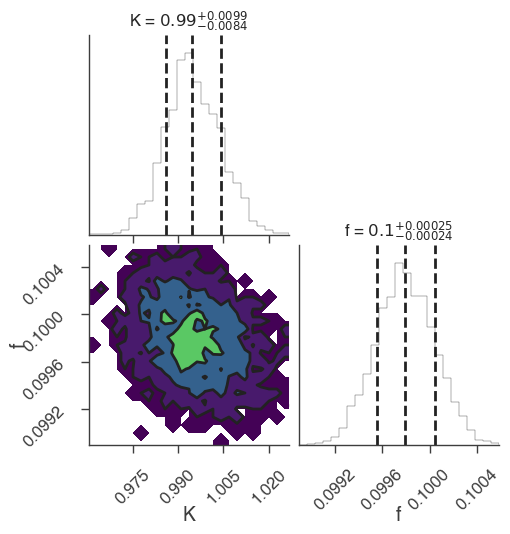

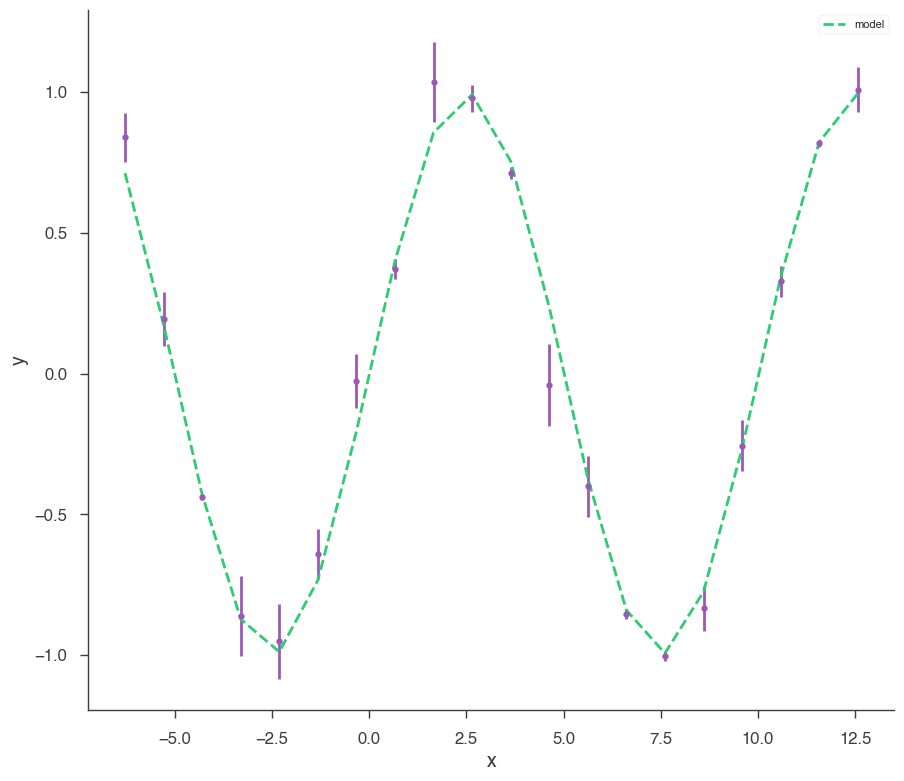

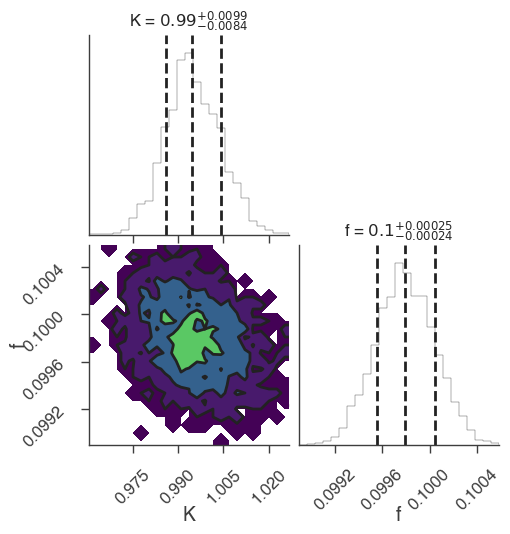

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

15:54:20 INFO      sampler set to dynesty_dynamic                                          ]8;id=611284;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=227584;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

78it [00:00, 776.61it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 84 | eff(%): 13.356 | loglstar:   -inf < -17991.944 <    inf | logz: -17999.008 +/-  0.119 | dlogz: 17906.618 >  0.010]

263it [00:00, 1402.92it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 346 | eff(%): 31.087 | loglstar:   -inf < -12470.694 <    inf | logz: -12477.906 +/-  0.117 | dlogz: 12351.048 >  0.010]

406it [00:00, 1413.40it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 613 | eff(%): 36.478 | loglstar:   -inf < -10489.238 <    inf | logz: -10496.934 +/-  0.123 | dlogz: 10397.268 >  0.010]

548it [00:00, 1289.23it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 982 | eff(%): 36.977 | loglstar:   -inf < -8824.220 <    inf | logz: -8831.822 +/-  0.119 | dlogz: 8729.195 >  0.010]   

679it [00:00, 1137.66it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 1476 | eff(%): 34.362 | loglstar:   -inf < -7538.107 <    inf | logz: -7546.010 +/-  0.122 | dlogz: 7443.206 >  0.010]

796it [00:00, 987.48it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 2031 | eff(%): 31.450 | loglstar:   -inf < -6825.271 <    inf | logz: -6833.447 +/-  0.124 | dlogz: 6792.776 >  0.010] 

899it [00:00, 874.58it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 2513 | eff(%): 29.837 | loglstar:   -inf < -6349.272 <    inf | logz: -6357.930 +/-  0.130 | dlogz: 6343.126 >  0.010]

991it [00:01, 806.05it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 3023 | eff(%): 28.129 | loglstar:   -inf < -5978.991 <    inf | logz: -5987.385 +/-  0.124 | dlogz: 5970.000 >  0.010]

1075it [00:01, 729.38it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 3636 | eff(%): 25.991 | loglstar:   -inf < -5597.502 <    inf | logz: -5605.500 +/-  0.126 | dlogz: 5587.692 >  0.010]

1151it [00:01, 670.34it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 4224 | eff(%): 24.365 | loglstar:   -inf < -5327.314 <    inf | logz: -5335.822 +/-  0.128 | dlogz: 5318.121 >  0.010]

1220it [00:01, 594.57it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 4933 | eff(%): 22.455 | loglstar:   -inf < -4865.747 <    inf | logz: -4875.092 +/-  0.137 | dlogz: 4866.241 >  0.010]

1281it [00:01, 562.57it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 5729 | eff(%): 20.565 | loglstar:   -inf < -4625.868 <    inf | logz: -4634.000 +/-  0.124 | dlogz: 4615.259 >  0.010]

1338it [00:01, 548.15it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 6333 | eff(%): 19.581 | loglstar:   -inf < -3810.628 <    inf | logz: -3820.209 +/-  0.138 | dlogz: 3825.331 >  0.010]

1394it [00:01, 526.33it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 7100 | eff(%): 18.342 | loglstar:   -inf < -3105.065 <    inf | logz: -3114.758 +/-  0.139 | dlogz: 3109.296 >  0.010]

1447it [00:01, 454.04it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 7823 | eff(%): 17.386 | loglstar:   -inf < -2586.230 <    inf | logz: -2596.029 +/-  0.140 | dlogz: 2591.851 >  0.010]

1494it [00:02, 403.16it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 8556 | eff(%): 16.497 | loglstar:   -inf < -2299.971 <    inf | logz: -2309.860 +/-  0.140 | dlogz: 2300.787 >  0.010] 

1536it [00:02, 375.08it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 9366 | eff(%): 15.569 | loglstar:   -inf < -2058.575 <    inf | logz: -2068.537 +/-  0.141 | dlogz: 2057.839 >  0.010]

1575it [00:02, 312.03it/s, batch: 0 | bound: 0 | nc: 38 | ncall: 10279 | eff(%): 14.612 | loglstar:   -inf < -1902.644 <    inf | logz: -1912.692 +/-  0.141 | dlogz: 1902.760 >  0.010]

1608it [00:02, 303.92it/s, batch: 0 | bound: 0 | nc: 33 | ncall: 10913 | eff(%): 14.089 | loglstar:   -inf < -1754.345 <    inf | logz: -1764.296 +/-  0.138 | dlogz: 1750.960 >  0.010]

1640it [00:02, 286.38it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 11503 | eff(%): 13.663 | loglstar:   -inf < -1644.712 <    inf | logz: -1654.613 +/-  0.137 | dlogz: 1641.065 >  0.010] 

1673it [00:02, 292.72it/s, batch: 0 | bound: 0 | nc: 58 | ncall: 12268 | eff(%): 13.103 | loglstar:   -inf < -1541.176 <    inf | logz: -1550.432 +/-  0.131 | dlogz: 1535.610 >  0.010]

1703it [00:02, 279.40it/s, batch: 0 | bound: 0 | nc: 111 | ncall: 12968 | eff(%): 12.645 | loglstar:   -inf < -1424.197 <    inf | logz: -1433.475 +/-  0.131 | dlogz: 1418.548 >  0.010]

1732it [00:03, 243.93it/s, batch: 0 | bound: 0 | nc: 21 | ncall: 13848 | eff(%): 12.071 | loglstar:   -inf < -1337.838 <    inf | logz: -1347.911 +/-  0.139 | dlogz: 1334.146 >  0.010] 

1758it [00:03, 239.91it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 14389 | eff(%): 11.807 | loglstar:   -inf < -1249.616 <    inf | logz: -1259.741 +/-  0.137 | dlogz: 1245.536 >  0.010]

1783it [00:03, 229.41it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 14977 | eff(%): 11.520 | loglstar:   -inf < -1199.577 <    inf | logz: -1209.662 +/-  0.138 | dlogz: 1195.490 >  0.010] 

1807it [00:03, 217.49it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 15626 | eff(%): 11.206 | loglstar:   -inf < -1158.871 <    inf | logz: -1169.066 +/-  0.137 | dlogz: 1154.611 >  0.010]

1829it [00:03, 209.63it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 16297 | eff(%): 10.889 | loglstar:   -inf < -1109.891 <    inf | logz: -1119.299 +/-  0.135 | dlogz: 1104.221 >  0.010] 

1851it [00:03, 192.26it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 17185 | eff(%): 10.466 | loglstar:   -inf < -1083.162 <    inf | logz: -1092.648 +/-  0.133 | dlogz: 1077.361 >  0.010]

1871it [00:03, 193.36it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 17776 | eff(%): 10.237 | loglstar:   -inf < -1042.628 <    inf | logz: -1052.540 +/-  0.136 | dlogz: 1037.616 >  0.010] 

1891it [00:04, 145.39it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18334 | eff(%): 10.040 | loglstar:   -inf < -1000.710 <    inf | logz: -1011.391 +/-  0.146 | dlogz: 1001.247 >  0.010]

2073it [00:04, 509.53it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 18644 | eff(%): 10.828 | loglstar:   -inf < -714.844 <    inf | logz: -725.766 +/-  0.145 | dlogz: 712.036 >  0.010]   

2208it [00:04, 708.66it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 18953 | eff(%): 11.350 | loglstar:   -inf < -556.937 <    inf | logz: -566.266 +/-  0.132 | dlogz: 552.284 >  0.010]

2295it [00:04, 572.09it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 19125 | eff(%): 11.694 | loglstar:   -inf < -481.685 <    inf | logz: -491.291 +/-  0.134 | dlogz: 477.161 >  0.010]

2465it [00:04, 815.25it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 19387 | eff(%): 12.395 | loglstar:   -inf < -343.360 <    inf | logz: -354.233 +/-  0.139 | dlogz: 340.066 >  0.010]

2598it [00:04, 936.26it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 19708 | eff(%): 12.856 | loglstar:   -inf < -264.758 <    inf | logz: -275.546 +/-  0.139 | dlogz: 260.973 >  0.010]

2709it [00:04, 728.35it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19915 | eff(%): 13.270 | loglstar:   -inf < -223.799 <    inf | logz: -234.167 +/-  0.138 | dlogz: 219.199 >  0.010]

2878it [00:05, 930.40it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 20202 | eff(%): 13.902 | loglstar:   -inf < -158.747 <    inf | logz: -169.007 +/-  0.138 | dlogz: 153.582 >  0.010]

3019it [00:05, 1040.25it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 20499 | eff(%): 14.377 | loglstar:   -inf < -125.834 <    inf | logz: -136.316 +/-  0.139 | dlogz: 120.591 >  0.010]

3142it [00:05, 820.43it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20683 | eff(%): 14.833 | loglstar:   -inf < -102.717 <    inf | logz: -113.397 +/-  0.140 | dlogz: 97.418 >  0.010]  

3353it [00:05, 1091.59it/s, batch: 0 | bound: 4 | nc: 3 | ncall: 21029 | eff(%): 15.574 | loglstar:   -inf < -71.695 <    inf | logz: -82.636 +/-  0.142 | dlogz: 66.776 >  0.010] 

3488it [00:05, 893.98it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21338 | eff(%): 15.972 | loglstar:   -inf < -56.219 <    inf | logz: -66.919 +/-  0.139 | dlogz: 50.721 >  0.010] 

3687it [00:05, 1117.49it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21572 | eff(%): 16.704 | loglstar:   -inf < -41.957 <    inf | logz: -52.877 +/-  0.141 | dlogz: 36.272 >  0.010]

3851it [00:05, 1235.20it/s, batch: 0 | bound: 5 | nc: 7 | ncall: 21871 | eff(%): 17.214 | loglstar:   -inf < -33.075 <    inf | logz: -44.118 +/-  0.141 | dlogz: 27.172 >  0.010]

3997it [00:06, 954.95it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 22154 | eff(%): 17.644 | loglstar:   -inf < -26.855 <    inf | logz: -37.839 +/-  0.140 | dlogz: 20.584 >  0.010] 

4187it [00:06, 1147.44it/s, batch: 0 | bound: 6 | nc: 3 | ncall: 22429 | eff(%): 18.261 | loglstar:   -inf < -21.040 <    inf | logz: -32.017 +/-  0.141 | dlogz: 14.371 >  0.010]

4329it [00:06, 1208.46it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 22745 | eff(%): 18.623 | loglstar:   -inf < -18.174 <    inf | logz: -29.061 +/-  0.140 | dlogz: 11.149 >  0.010]

4470it [00:06, 974.64it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22940 | eff(%): 19.070 | loglstar:   -inf < -16.177 <    inf | logz: -26.928 +/-  0.140 | dlogz:  8.728 >  0.010] 

4650it [00:06, 1150.28it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 23193 | eff(%): 19.626 | loglstar:   -inf < -14.186 <    inf | logz: -25.032 +/-  0.140 | dlogz:  6.471 >  0.010]

4804it [00:06, 1239.66it/s, batch: 0 | bound: 7 | nc: 6 | ncall: 23507 | eff(%): 20.011 | loglstar:   -inf < -12.942 <    inf | logz: -23.778 +/-  0.140 | dlogz:  4.913 >  0.010]

4946it [00:06, 1000.86it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23721 | eff(%): 20.420 | loglstar:   -inf < -12.160 <    inf | logz: -22.951 +/-  0.140 | dlogz:  3.815 >  0.010]

5083it [00:07, 1079.11it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 23944 | eff(%): 20.794 | loglstar:   -inf < -11.480 <    inf | logz: -22.348 +/-  0.140 | dlogz:  2.968 >  0.010]

5220it [00:07, 1146.74it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 24242 | eff(%): 21.098 | loglstar:   -inf < -10.958 <    inf | logz: -21.858 +/-  0.140 | dlogz:  2.263 >  0.010]

5348it [00:07, 864.84it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 24455 | eff(%): 21.431 | loglstar:   -inf < -10.597 <    inf | logz: -21.500 +/-  0.140 | dlogz:  1.735 >  0.010] 

5525it [00:07, 1053.41it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24710 | eff(%): 21.916 | loglstar:   -inf < -10.225 <    inf | logz: -21.131 +/-  0.140 | dlogz:  1.183 >  0.010]

5659it [00:07, 1117.56it/s, batch: 0 | bound: 9 | nc: 5 | ncall: 25006 | eff(%): 22.187 | loglstar:   -inf < -10.012 <    inf | logz: -20.923 +/-  0.140 | dlogz:  0.879 >  0.010]

5788it [00:07, 926.40it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 25214 | eff(%): 22.509 | loglstar:   -inf < -9.846 <    inf | logz: -20.768 +/-  0.141 | dlogz:  0.658 >  0.010] 

5995it [00:07, 1177.55it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 25603 | eff(%): 22.967 | loglstar:   -inf < -9.645 <    inf | logz: -20.588 +/-  0.141 | dlogz:  0.416 >  0.010]

6134it [00:08, 919.24it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25882 | eff(%): 23.251 | loglstar:   -inf < -9.570 <    inf | logz: -20.502 +/-  0.141 | dlogz:  0.306 >  0.010] 

6366it [00:08, 1203.83it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 26214 | eff(%): 23.830 | loglstar:   -inf < -9.460 <    inf | logz: -20.403 +/-  0.141 | dlogz:  0.186 >  0.010]

6516it [00:08, 1251.67it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 26525 | eff(%): 24.111 | loglstar:   -inf < -9.412 <    inf | logz: -20.359 +/-  0.141 | dlogz:  0.135 >  0.010]

6663it [00:08, 967.08it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26741 | eff(%): 24.459 | loglstar:   -inf < -9.382 <    inf | logz: -20.327 +/-  0.141 | dlogz:  0.099 >  0.010] 

6845it [00:08, 1139.37it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 27015 | eff(%): 24.877 | loglstar:   -inf < -9.349 <    inf | logz: -20.298 +/-  0.141 | dlogz:  0.068 >  0.010]

7005it [00:08, 891.09it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27350 | eff(%): 25.153 | loglstar:   -inf < -9.332 <    inf | logz: -20.280 +/-  0.141 | dlogz:  0.049 >  0.010] 

7203it [00:09, 1093.61it/s, batch: 0 | bound: 13 | nc: 3 | ncall: 27624 | eff(%): 25.612 | loglstar:   -inf < -9.313 <    inf | logz: -20.265 +/-  0.141 | dlogz:  0.033 >  0.010]

7362it [00:09, 1197.52it/s, batch: 0 | bound: 13 | nc: 2 | ncall: 27925 | eff(%): 25.900 | loglstar:   -inf < -9.303 <    inf | logz: -20.256 +/-  0.141 | dlogz:  0.024 >  0.010]

7508it [00:09, 923.69it/s, batch: 0 | bound: 14 | nc: 1 | ncall: 28194 | eff(%): 26.166 | loglstar:   -inf < -9.295 <    inf | logz: -20.250 +/-  0.141 | dlogz:  0.018 >  0.010] 

7688it [00:09, 1094.57it/s, batch: 0 | bound: 14 | nc: 2 | ncall: 28489 | eff(%): 26.520 | loglstar:   -inf < -9.288 <    inf | logz: -20.245 +/-  0.141 | dlogz:  0.012 >  0.010]

8001it [00:09, 1538.06it/s, batch: 0 | bound: 14 | nc: 1 | ncall: 28914 | eff(%): 27.395 | loglstar:   -inf < -9.281 <    inf | logz: -20.238 +/-  0.141 | dlogz:  0.006 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8293it [00:10, 713.69it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 29206 | eff(%): 28.395 | loglstar: -11.189 < -10.059 < -9.777 | logz: -20.233 +/-  0.145 | stop:  1.297]          

8477it [00:10, 842.74it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 29455 | eff(%): 28.283 | loglstar: -11.189 < -10.590 < -9.777 | logz: -20.233 +/-  0.145 | stop:  1.297]

8651it [00:10, 968.78it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 29794 | eff(%): 28.541 | loglstar: -11.189 < -10.201 < -9.777 | logz: -20.233 +/-  0.145 | stop:  1.297]

8813it [00:10, 903.81it/s, batch: 1 | bound: 3 | nc: 2 | ncall: 30073 | eff(%): 28.810 | loglstar: -11.189 < -9.917 < -9.777 | logz: -20.233 +/-  0.145 | stop:  1.297] 

9139it [00:10, 1297.53it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 30479 | eff(%): 29.688 | loglstar: -11.189 < -9.582 < -9.777 | logz: -20.233 +/-  0.145 | stop:  1.297]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9434it [00:11, 603.10it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 30783 | eff(%): 30.647 | loglstar: -11.659 < -11.033 < -11.188 | logz: -20.223 +/-  0.119 | stop:  1.071]

9769it [00:12, 858.95it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 31155 | eff(%): 31.081 | loglstar: -11.659 < -10.326 < -11.188 | logz: -20.223 +/-  0.119 | stop:  1.071]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



10032it [00:13, 514.77it/s, batch: 3 | bound: 0 | nc: 2 | ncall: 31431 | eff(%): 31.918 | loglstar: -12.107 < -10.076 < -11.658 | logz: -20.219 +/-  0.111 | stop:  1.114]

10375it [00:13, 733.05it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 31795 | eff(%): 32.381 | loglstar: -12.107 < -10.384 < -11.658 | logz: -20.219 +/-  0.111 | stop:  1.114]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



10607it [00:13, 565.24it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 32040 | eff(%): 33.105 | loglstar: -12.107 < -9.283 < -11.658 | logz: -20.219 +/-  0.111 | stop:  0.900] 

10607it [00:13, 768.42it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 32040 | eff(%): 33.105 | loglstar: -12.107 < -9.283 < -11.658 | logz: -20.219 +/-  0.111 | stop:  0.900]

15:54:35 INFO      fit restored to maximum of posterior                                         ]8;id=3958;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=191170;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=922359;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=204330;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                               
demo.spectrum.main.Sin.K        (9.95 +/- 0.09) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (9.979 -0.024 +0.025) x 10^-2        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -9.268953
total        -9.268953

Values of statistical measures:

statistical measures
AIC                23.243789
BIC                24.529371
DIC                22.622050
PDIC                2.042052
log(Z)             -8.774171

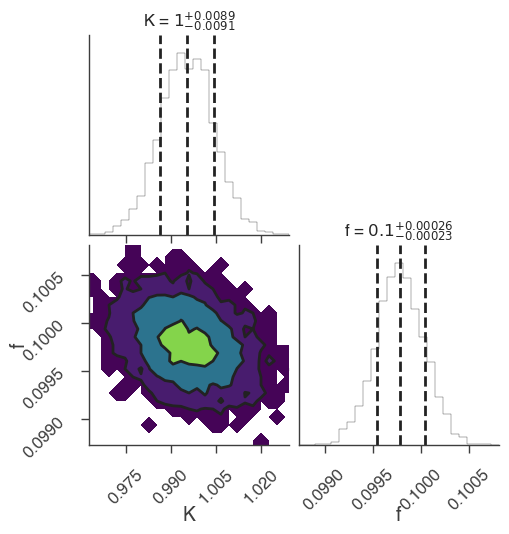

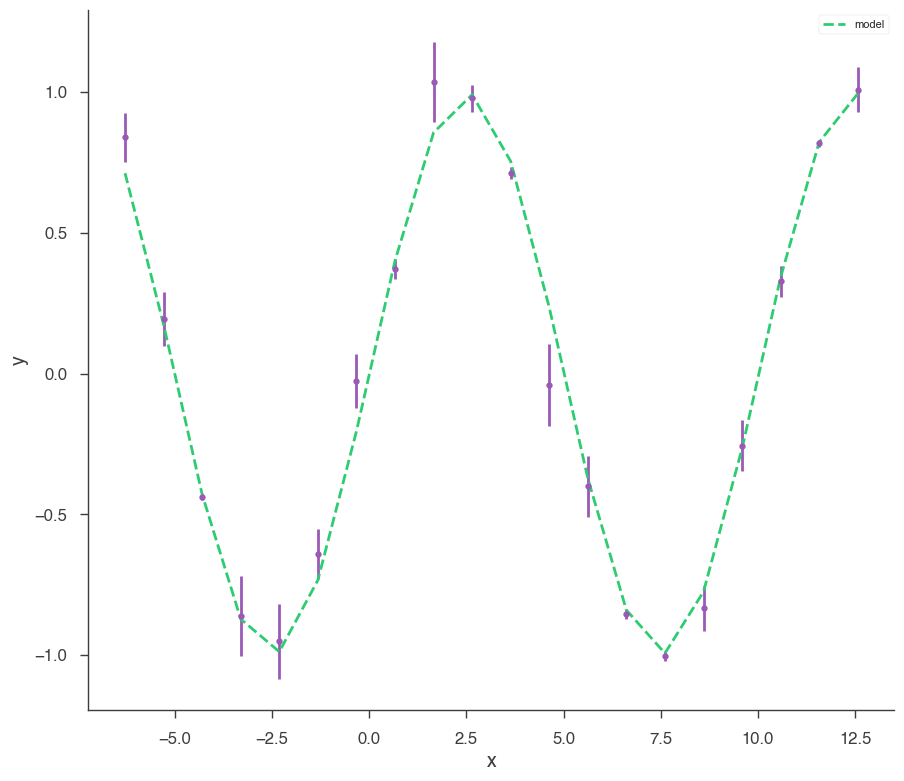

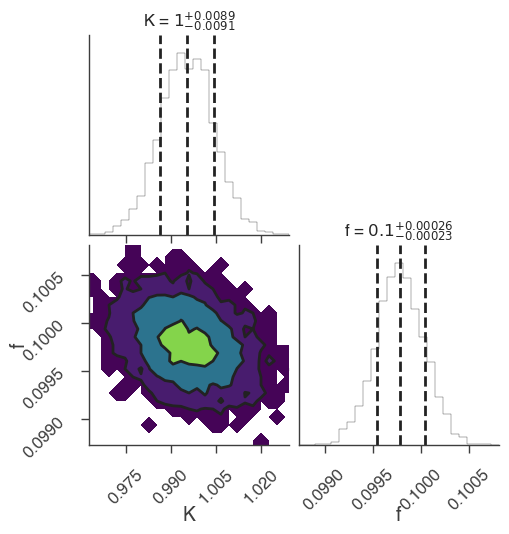

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

         INFO      sampler set to zeus                                                     ]8;id=306226;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=476723;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 6/625 [00:00<00:10, 56.29it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:10, 57.72it/s]

Sampling progress :   3%|▎         | 20/625 [00:00<00:09, 66.89it/s]

Sampling progress :   4%|▍         | 28/625 [00:00<00:08, 68.35it/s]

Sampling progress :   6%|▌         | 35/625 [00:00<00:08, 67.87it/s]

Sampling progress :   7%|▋         | 43/625 [00:00<00:08, 70.31it/s]

Sampling progress :   8%|▊         | 51/625 [00:00<00:08, 69.74it/s]

Sampling progress :   9%|▉         | 59/625 [00:00<00:07, 71.79it/s]

Sampling progress :  11%|█         | 67/625 [00:00<00:07, 72.40it/s]

Sampling progress :  12%|█▏        | 75/625 [00:01<00:07, 71.14it/s]

Sampling progress :  13%|█▎        | 83/625 [00:01<00:07, 69.82it/s]

Sampling progress :  14%|█▍        | 90/625 [00:01<00:07, 69.60it/s]

Sampling progress :  16%|█▌        | 97/625 [00:01<00:08, 64.30it/s]

Sampling progress :  17%|█▋        | 105/625 [00:01<00:07, 66.03it/s]

Sampling progress :  18%|█▊        | 113/625 [00:01<00:07, 68.47it/s]

Sampling progress :  19%|█▉        | 120/625 [00:01<00:07, 67.78it/s]

Sampling progress :  20%|██        | 127/625 [00:01<00:07, 66.88it/s]

Sampling progress :  21%|██▏       | 134/625 [00:01<00:07, 63.96it/s]

Sampling progress :  23%|██▎       | 141/625 [00:02<00:07, 64.76it/s]

Sampling progress :  24%|██▍       | 149/625 [00:02<00:07, 66.85it/s]

Sampling progress :  25%|██▍       | 156/625 [00:02<00:07, 64.76it/s]

Sampling progress :  26%|██▌       | 163/625 [00:02<00:07, 63.33it/s]

Sampling progress :  27%|██▋       | 170/625 [00:02<00:07, 62.25it/s]

Sampling progress :  28%|██▊       | 178/625 [00:02<00:06, 66.43it/s]

Sampling progress :  30%|██▉       | 185/625 [00:02<00:06, 65.02it/s]

Sampling progress :  31%|███       | 192/625 [00:02<00:06, 65.79it/s]

Sampling progress :  32%|███▏      | 199/625 [00:02<00:06, 66.48it/s]

Sampling progress :  33%|███▎      | 206/625 [00:03<00:06, 65.70it/s]

Sampling progress :  34%|███▍      | 215/625 [00:03<00:05, 70.77it/s]

Sampling progress :  36%|███▌      | 223/625 [00:03<00:05, 72.32it/s]

Sampling progress :  37%|███▋      | 231/625 [00:03<00:05, 70.71it/s]

Sampling progress :  38%|███▊      | 239/625 [00:03<00:05, 72.95it/s]

Sampling progress :  40%|███▉      | 248/625 [00:03<00:05, 75.09it/s]

Sampling progress :  41%|████      | 256/625 [00:03<00:04, 74.36it/s]

Sampling progress :  42%|████▏     | 264/625 [00:03<00:04, 73.36it/s]

Sampling progress :  44%|████▎     | 272/625 [00:04<00:05, 67.13it/s]

Sampling progress :  45%|████▍     | 279/625 [00:04<00:05, 64.42it/s]

Sampling progress :  46%|████▌     | 286/625 [00:04<00:05, 62.93it/s]

Sampling progress :  47%|████▋     | 293/625 [00:04<00:05, 62.96it/s]

Sampling progress :  48%|████▊     | 300/625 [00:04<00:05, 64.27it/s]

Sampling progress :  49%|████▉     | 307/625 [00:04<00:04, 64.24it/s]

Sampling progress :  50%|█████     | 314/625 [00:04<00:04, 62.24it/s]

Sampling progress :  51%|█████▏    | 321/625 [00:04<00:04, 61.81it/s]

Sampling progress :  52%|█████▏    | 328/625 [00:04<00:05, 58.96it/s]

Sampling progress :  53%|█████▎    | 334/625 [00:05<00:04, 59.01it/s]

Sampling progress :  54%|█████▍    | 340/625 [00:05<00:04, 57.48it/s]

Sampling progress :  55%|█████▌    | 346/625 [00:05<00:04, 57.83it/s]

Sampling progress :  56%|█████▋    | 353/625 [00:05<00:04, 60.60it/s]

Sampling progress :  58%|█████▊    | 360/625 [00:05<00:04, 62.38it/s]

Sampling progress :  59%|█████▊    | 367/625 [00:05<00:04, 63.32it/s]

Sampling progress :  60%|█████▉    | 374/625 [00:05<00:04, 62.71it/s]

Sampling progress :  61%|██████    | 381/625 [00:05<00:03, 64.32it/s]

Sampling progress :  62%|██████▏   | 388/625 [00:05<00:03, 64.35it/s]

Sampling progress :  64%|██████▎   | 397/625 [00:05<00:03, 70.96it/s]

Sampling progress :  65%|██████▍   | 405/625 [00:06<00:03, 72.33it/s]

Sampling progress :  66%|██████▌   | 414/625 [00:06<00:02, 76.63it/s]

Sampling progress :  68%|██████▊   | 422/625 [00:06<00:02, 75.79it/s]

Sampling progress :  69%|██████▉   | 430/625 [00:06<00:02, 76.24it/s]

Sampling progress :  70%|███████   | 439/625 [00:06<00:02, 78.64it/s]

Sampling progress :  72%|███████▏  | 448/625 [00:06<00:02, 81.14it/s]

Sampling progress :  73%|███████▎  | 457/625 [00:06<00:02, 81.85it/s]

Sampling progress :  75%|███████▍  | 466/625 [00:06<00:01, 80.25it/s]

Sampling progress :  76%|███████▌  | 475/625 [00:06<00:01, 80.33it/s]

Sampling progress :  77%|███████▋  | 484/625 [00:07<00:01, 78.42it/s]

Sampling progress :  79%|███████▊  | 492/625 [00:07<00:01, 76.00it/s]

Sampling progress :  80%|████████  | 500/625 [00:07<00:01, 62.56it/s]

Sampling progress :  81%|████████▏ | 508/625 [00:07<00:01, 65.61it/s]

Sampling progress :  82%|████████▏ | 515/625 [00:07<00:01, 66.70it/s]

Sampling progress :  84%|████████▎ | 523/625 [00:07<00:01, 69.88it/s]

Sampling progress :  85%|████████▍ | 531/625 [00:07<00:01, 72.56it/s]

Sampling progress :  86%|████████▌ | 539/625 [00:07<00:01, 73.79it/s]

Sampling progress :  88%|████████▊ | 548/625 [00:08<00:01, 76.66it/s]

Sampling progress :  89%|████████▉ | 557/625 [00:08<00:00, 78.44it/s]

Sampling progress :  90%|█████████ | 565/625 [00:08<00:00, 75.18it/s]

Sampling progress :  92%|█████████▏| 573/625 [00:08<00:00, 73.81it/s]

Sampling progress :  93%|█████████▎| 581/625 [00:08<00:00, 71.36it/s]

Sampling progress :  94%|█████████▍| 589/625 [00:08<00:00, 69.69it/s]

Sampling progress :  96%|█████████▌| 597/625 [00:08<00:00, 68.92it/s]

Sampling progress :  97%|█████████▋| 605/625 [00:08<00:00, 69.96it/s]

Sampling progress :  98%|█████████▊| 613/625 [00:08<00:00, 70.29it/s]

Sampling progress : 100%|█████████▉| 622/625 [00:09<00:00, 73.81it/s]

Sampling progress : 100%|██████████| 625/625 [00:09<00:00, 68.85it/s]

15:54:45 INFO      fit restored to maximum of posterior                                         ]8;id=611824;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=807305;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=931808;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=573991;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 19


Scale Factor: 1.209351


Mean Integrated Autocorrelation Time: 3.04


Effective Sample Size: 4108.87


Number of Log Probability Evaluations: 65497


Effective Samples per Log Probability Evaluation: 0.062734


None


Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                               
demo.spectrum.main.Sin.K        (9.95 +/- 0.09) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (9.979 -0.024 +0.025) x 10^-2        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -9.268833
total        -9.268833

Values of statistical measures:

statistical measures
AIC              23.243549
BIC              24.529131
DIC              22.570046
PDIC              2.015412

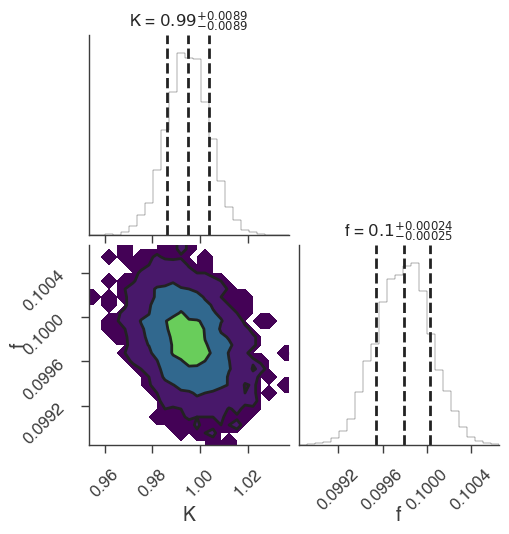

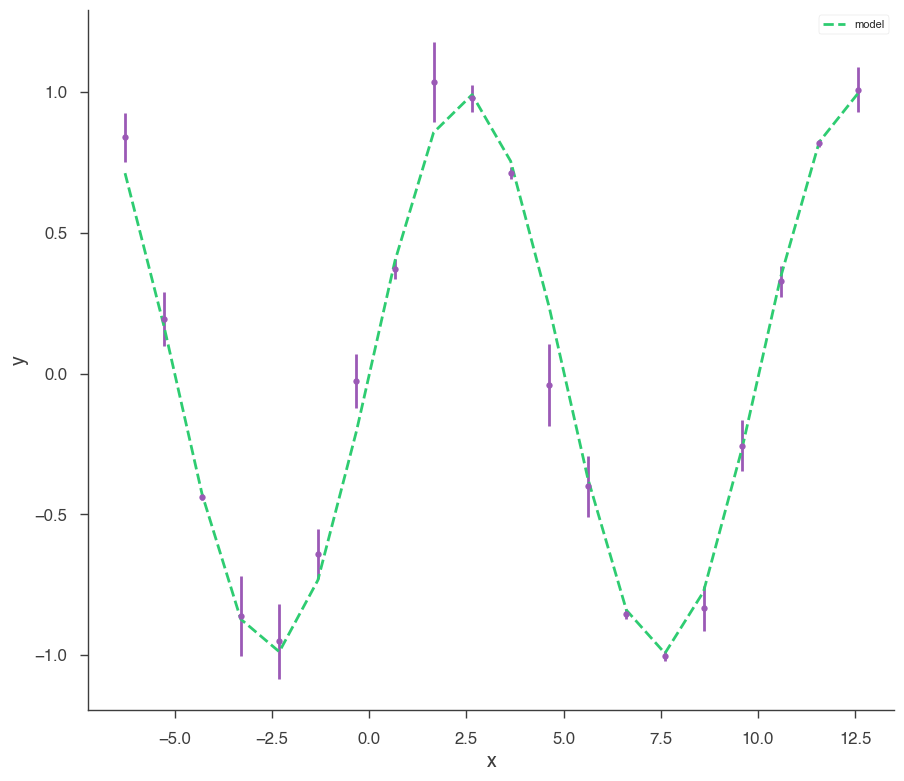

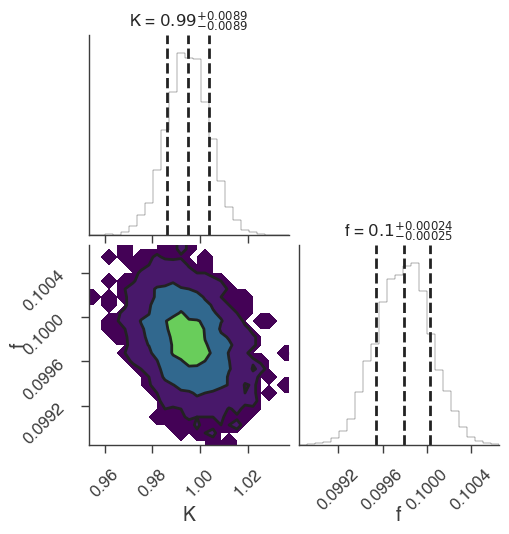

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

15:54:46 INFO      sampler set to ultranest                                                ]8;id=579737;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=270487;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-9  


[ultranest] Likelihood function evaluations: 8743


[ultranest]   logZ = -19.81 +- 0.1316


[ultranest] Effective samples strategy satisfied (ESS = 984.8, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.43, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.13 tail:0.41 total:0.43 required:<0.50


[ultranest] done iterating.


15:54:54 INFO      fit restored to maximum of posterior                                         ]8;id=805240;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=223847;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=169010;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=756775;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                               
demo.spectrum.main.Sin.K     (9.95 -0.09 +0.10) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (9.978 -0.023 +0.027) x 10^-2        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -9.270079
total        -9.270079

Values of statistical measures:

statistical measures
AIC                23.246040
BIC                24.531623
DIC                22.598570
PDIC                2.030050
log(Z)             -8.605408

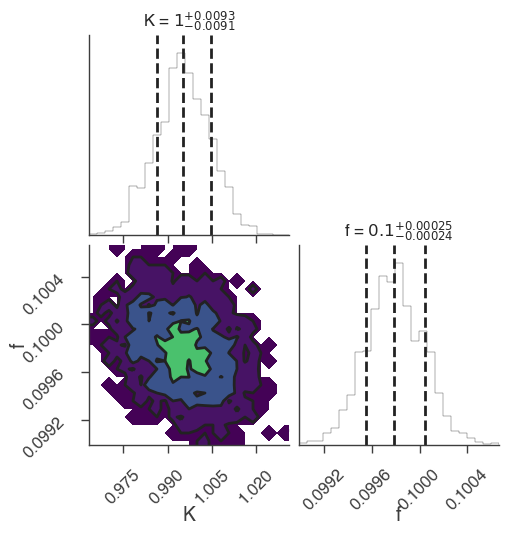

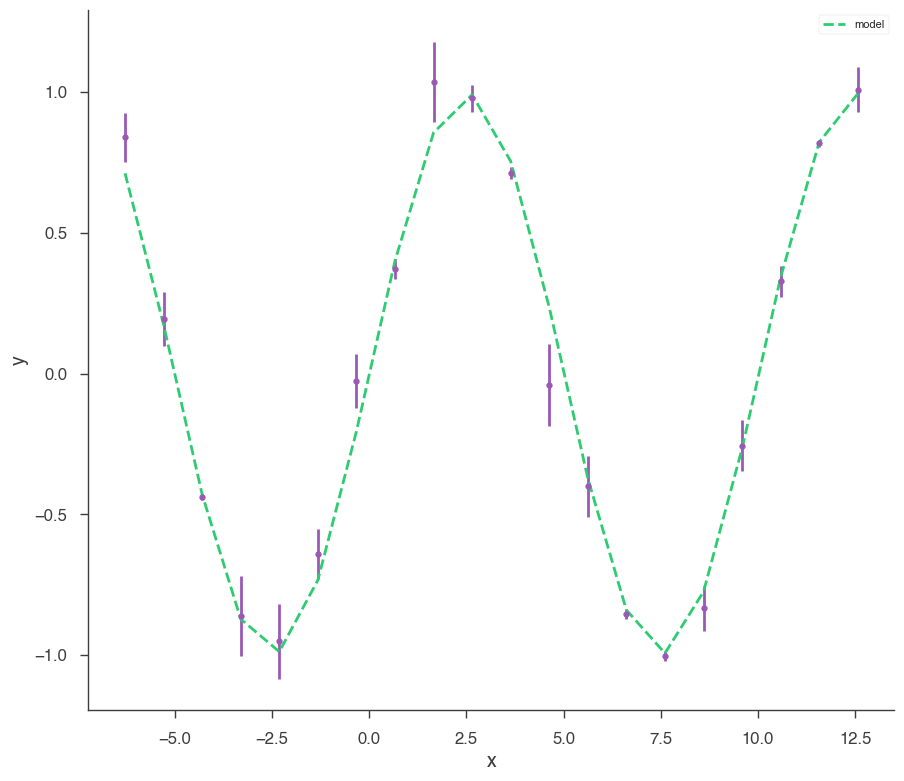

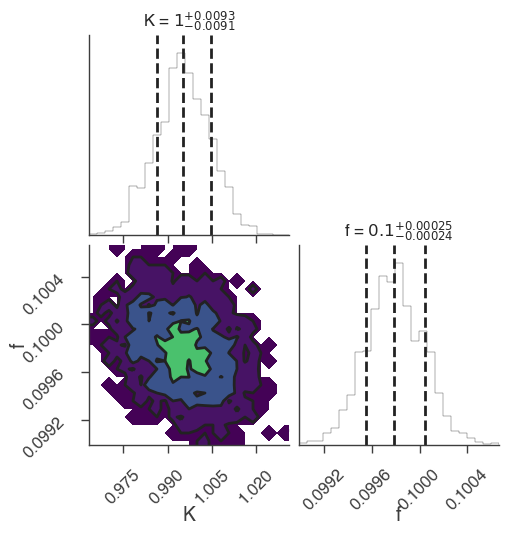

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()